참고 소스 : https://github.com/therealcyberlord/coronavirus_visualization_and_prediction/blob/master/coronavirus-covid-19-visualization-prediction.ipynb

데이터 : https://github.com/CSSEGISandData/COVID-19

In [0]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline


In [46]:
# 존스 홉킨스 데이터 다운로드
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8


In [47]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20'],
      dtype='object')

In [0]:
# 일일 데이터만 추출('Province/State', 'Country/Region', 'Lat', 'Long' 컬럼 제외)
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]


In [49]:
dates = confirmed.keys()
print(dates)
adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20'],
      dtype='object')


In [0]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]


In [51]:
# 국가 리스트 및 국가별 인구 수
TOP_N = 17  # 확진자 상위 국가 N
unique_countries = list(confirmed_df['Country/Region'].unique())
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in
                    sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
unique_countries = unique_countries[:TOP_N]

print(unique_countries)

population = {'China':1399620000,
 'Italy':60278616,
 'US':330093000,
 'Spain':46934632,
 'Germany':83073100,
 'Iran':82878200,
 'France':67055000,
 'Korea, South':51851427,
 'Switzerland':8544034,
 'United Kingdom':66435600,
 'Netherlands':17084459,
 'Japan':126150000,
 'Netherlands':17084459,
 'Austria':8751820,
 'Belgium':11498519,
 'Canada':36954000,
 'Turkey':82600000,
 'Portugal':10291027,
 'Brazil':374563873
}


['US', 'Italy', 'Spain', 'China', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland', 'Turkey', 'Belgium', 'Netherlands', 'Austria', 'Korea, South', 'Canada', 'Portugal', 'Brazil']


In [52]:
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region'] == unique_countries[i]].sum()
visual_unique_countries = []
visual_confirmed_cases = []
for i in range(len(country_confirmed_cases[:TOP_N])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

list(zip(visual_unique_countries, visual_confirmed_cases))

[('US', 213372),
 ('Italy', 110574),
 ('Spain', 104118),
 ('China', 82361),
 ('Germany', 77872),
 ('France', 57749),
 ('Iran', 47593),
 ('United Kingdom', 29865),
 ('Switzerland', 17768),
 ('Turkey', 15679),
 ('Belgium', 13964),
 ('Netherlands', 13696),
 ('Austria', 10711),
 ('Korea, South', 9887),
 ('Canada', 9560),
 ('Portugal', 8251),
 ('Brazil', 6836)]

국가별 누적 확진자 수평 막대 그래프

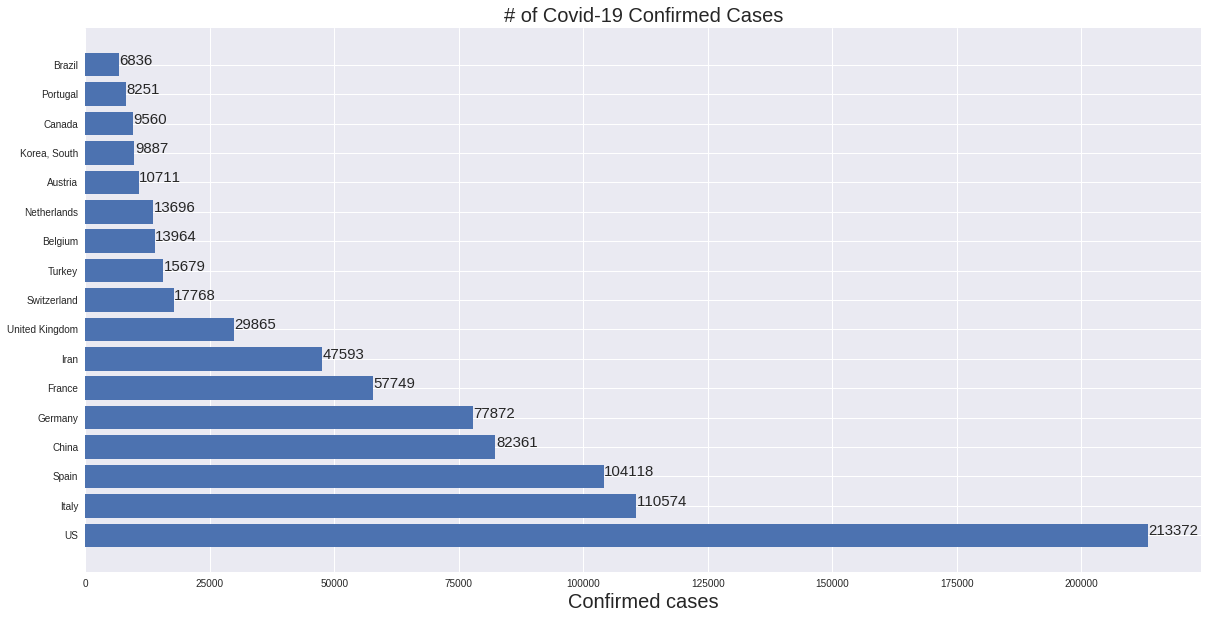

In [53]:
plt.figure(figsize=(20, 10))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.xlabel('Confirmed cases', size=20)
plt.title('# of Covid-19 Confirmed Cases', size=20)
for i, case in enumerate(visual_confirmed_cases):
  plt.annotate(xy=[case + 100,i], s=case, size=15)


인구 수 10만명 당 확진자 수

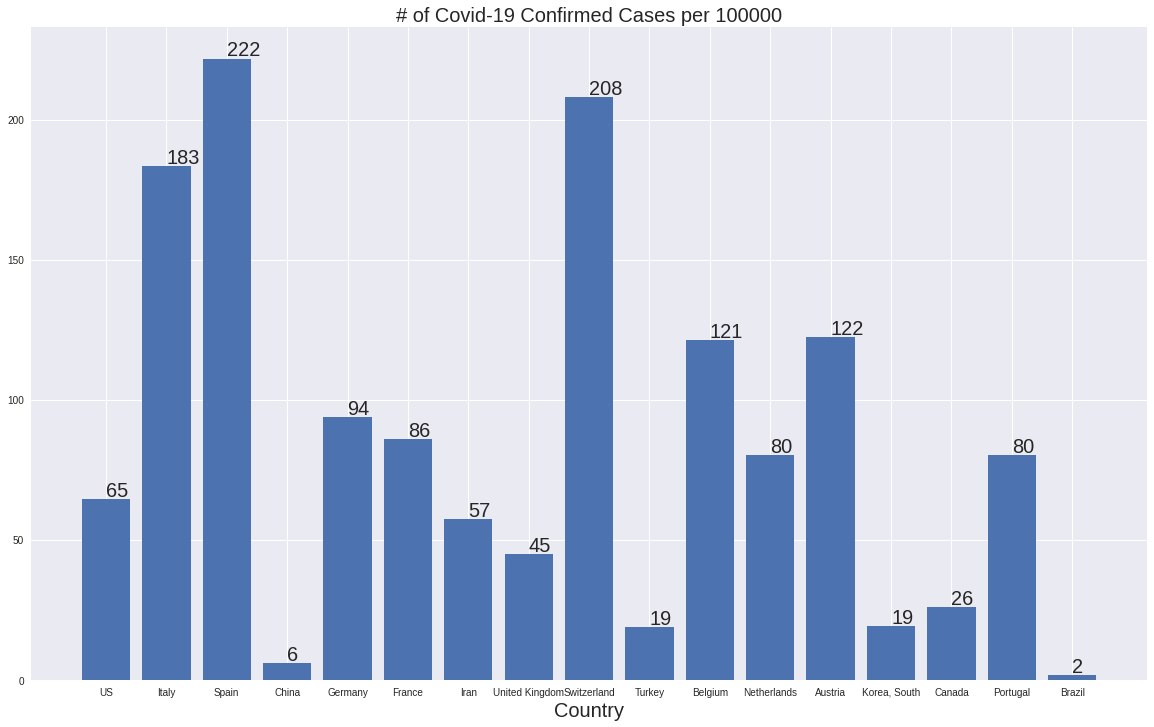

In [54]:
plt.figure(figsize=(20, 12))
v_unique_countries = visual_unique_countries
#v_unique_countries = visual_unique_countries + ['Japan']
visual_confirmed_cases = []
for i in range(len(v_unique_countries)):
    visual_confirmed_cases.append(latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum())
population_confirmed_cases = []
for country, case in zip(v_unique_countries, visual_confirmed_cases):
  population_confirmed_cases.append(case * 100000 / population[country])
plt.bar(v_unique_countries, population_confirmed_cases)
plt.xlabel('Country', size=20)
plt.title('# of Covid-19 Confirmed Cases per 100000', size=20)
for i, case in enumerate(population_confirmed_cases):
  plt.annotate(xy=[i, case + 1], s='{:.0f}'.format(case), size=20)

국가별 사망률

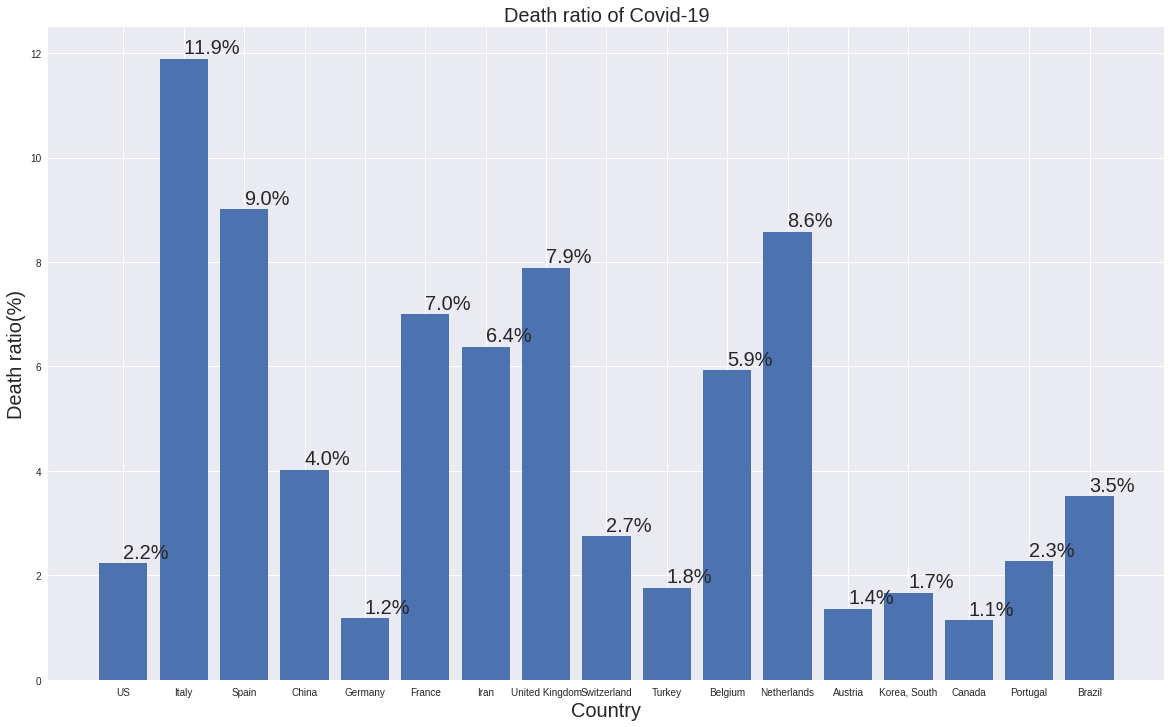

In [55]:
plt.figure(figsize=(20, 12))
# v_unique_countries = visual_unique_countries + ['Japan']
death_ratios = []
for i in range(len(v_unique_countries)):
  ratio = (latest_deaths[deaths_df['Country/Region'] == v_unique_countries[i]].sum() * 100)  / latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum()
  death_ratios.append(ratio)

plt.bar(v_unique_countries, death_ratios)
plt.xlabel('Country', size=20)
plt.ylabel('Death ratio(%)', size=20)
plt.title('Death ratio of Covid-19', size=20)
for i, ratio in enumerate(death_ratios):
  plt.annotate(xy=[i, ratio + 0.1], s='{:.1f}%'.format(ratio), size=20)


국가별 확진자 상대 비율(파이 챠트)

Text(0.5, 1.0, 'Ratio of Covid-19 Confirmed Cases')

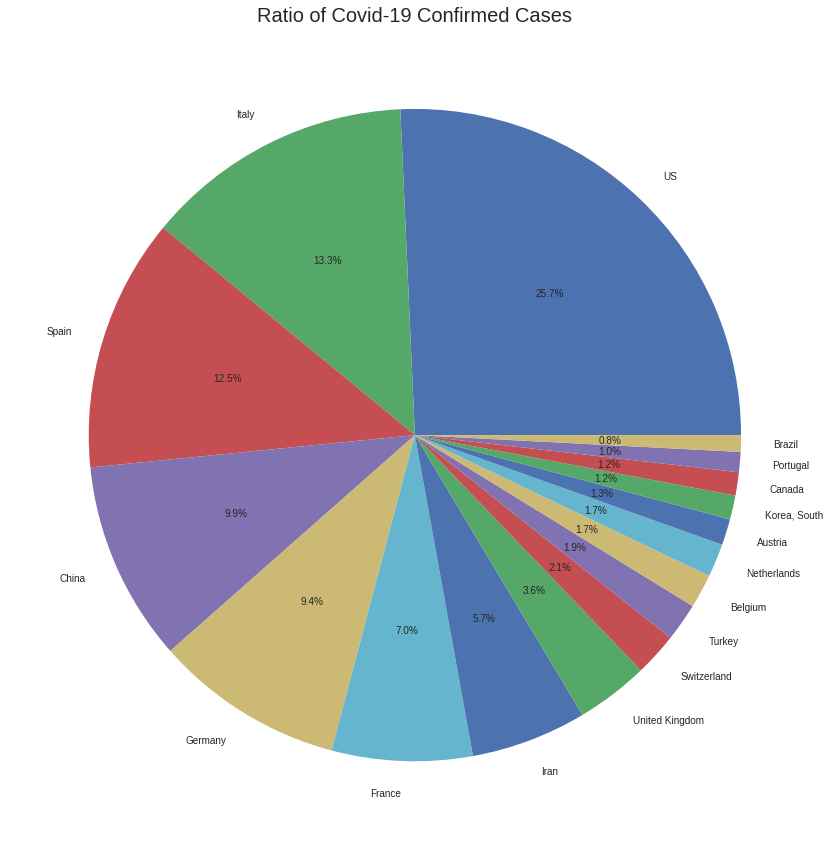

In [56]:
plt.figure(figsize=(20, 15))
plt.pie(visual_confirmed_cases, labels=visual_unique_countries,autopct='%1.1f%%')
plt.title('Ratio of Covid-19 Confirmed Cases', size=20)

전체 누적 확진자 및 신규 확진자

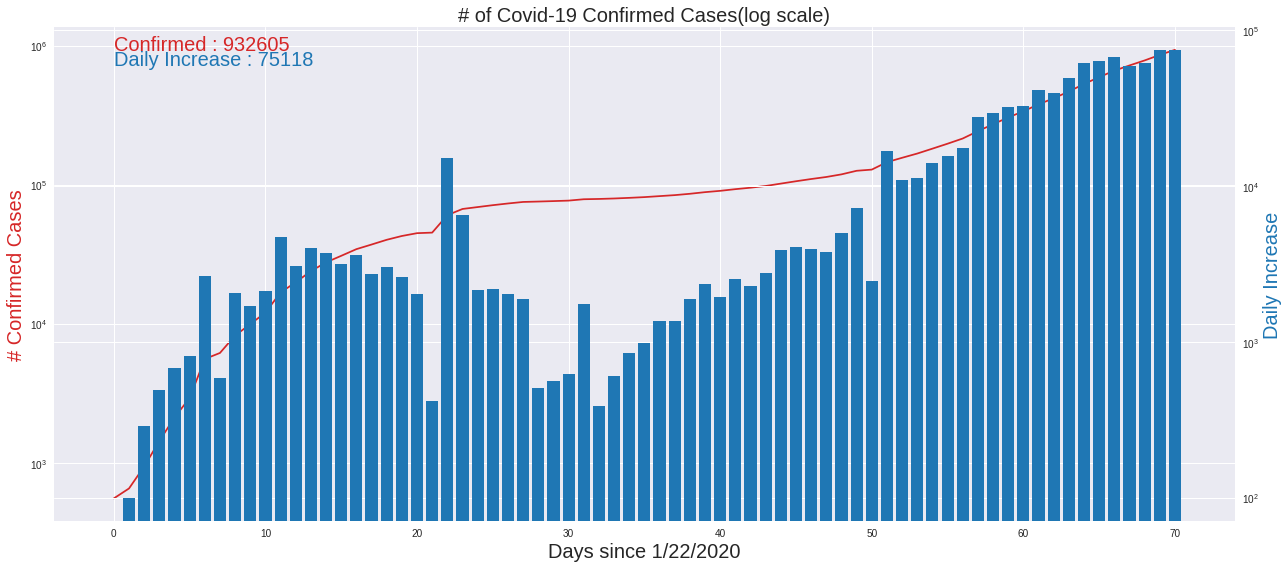

In [57]:
adjusted_dates = [i for i in range(len(dates))]

cases = confirmed.sum(axis=0)
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_yscale('log')
ax1.plot(adjusted_dates, cases, color=color)
ax1.set_xlabel('Days since 1/22/2020', size=20)
ax1.set_ylabel('# Confirmed Cases', color=color, size=20)
ax1.text(0, cases[-1], 'Confirmed : {}'.format(cases[-1]), size=20, color=color)
new_cases = [0]
for i, case in enumerate(cases[:-1]):
  new_cases.append(cases[i + 1] - cases[i])

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_yscale('log')
ax2.bar(adjusted_dates, new_cases, color=color)
ax2.set_ylabel('Daily Increase', color=color, size=20)
ax2.text(0, new_cases[-1] * 0.8, 'Daily Increase : {}'.format(new_cases[-1]), size=20, color=color)
plt.title('# of Covid-19 Confirmed Cases(log scale)', size=20)

fig.tight_layout()


국가별 신규 확진자 추이

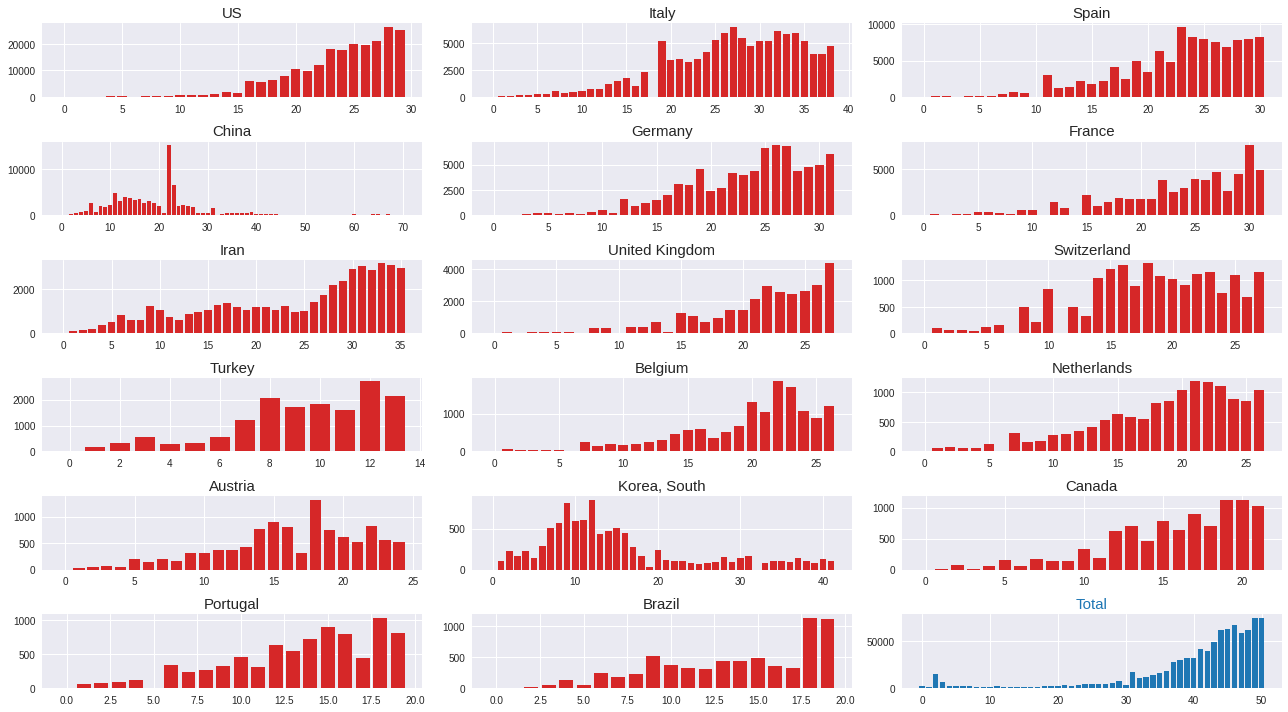

In [58]:
color = 'tab:red'
fig, axs = plt.subplots(6, 3, figsize=(18, 10))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
  cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  cases = [c for c in cases if c > 100]
  adjusted_dates = [i for i in range(len(cases))]
  new_cases =[0]
  for i, case in enumerate(cases[:-1]):
    new_cases.append(cases[i + 1] - cases[i])
  row, col = divmod(index, 3)
  axs[row, col].bar(adjusted_dates, new_cases, color=color)
  axs[row, col].set_title(country, size=15)

total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
color = 'tab:blue'
axs[5, 2].bar(adjusted_dates, new_cases, color=color)
axs[5, 2].set_title('Total', size=15, color=color)

fig.tight_layout()

국가별 누적 확진자 증가율

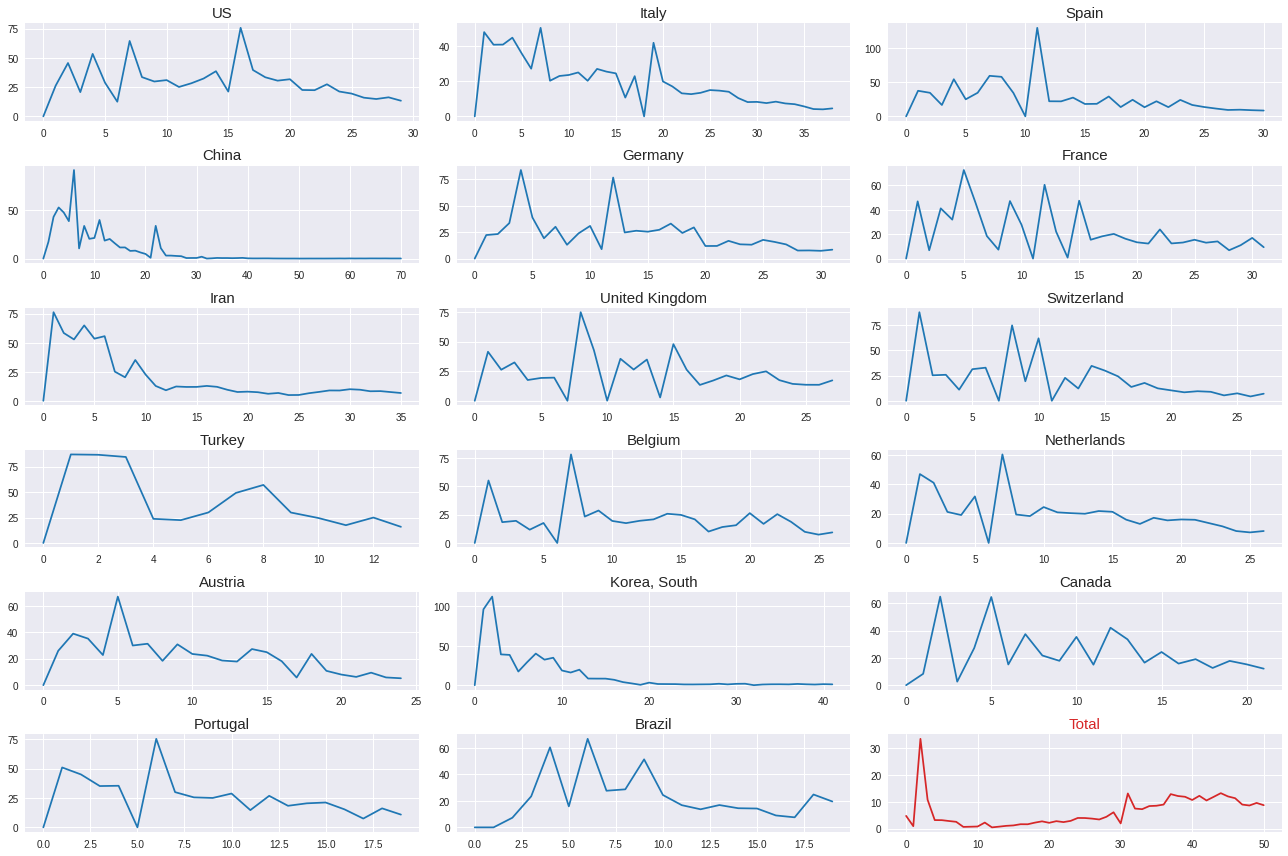

In [59]:
color = 'tab:blue'
fig, axs = plt.subplots(6, 3, figsize=(18, 12))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
  cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  cases = [c for c in cases if c > 100]
  adjusted_dates = [i for i in range(len(cases))]
  new_cases =[0]
  for i, case in enumerate(cases[:-1]):
    new_cases.append((cases[i + 1] - cases[i]) * 100 / cases[i])
  row, col = divmod(index, 3)
  axs[row, col].plot(adjusted_dates, new_cases, color=color)
  axs[row, col].set_title(country, size=15)

total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append((total_cases[i + 1] - total_cases[i]) * 100 /total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
color = 'tab:red'
axs[5, 2].plot(adjusted_dates, new_cases, color=color)
axs[5, 2].set_title('Total', size=15, color=color)

fig.tight_layout()

국가별 일일 사망률 추이

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

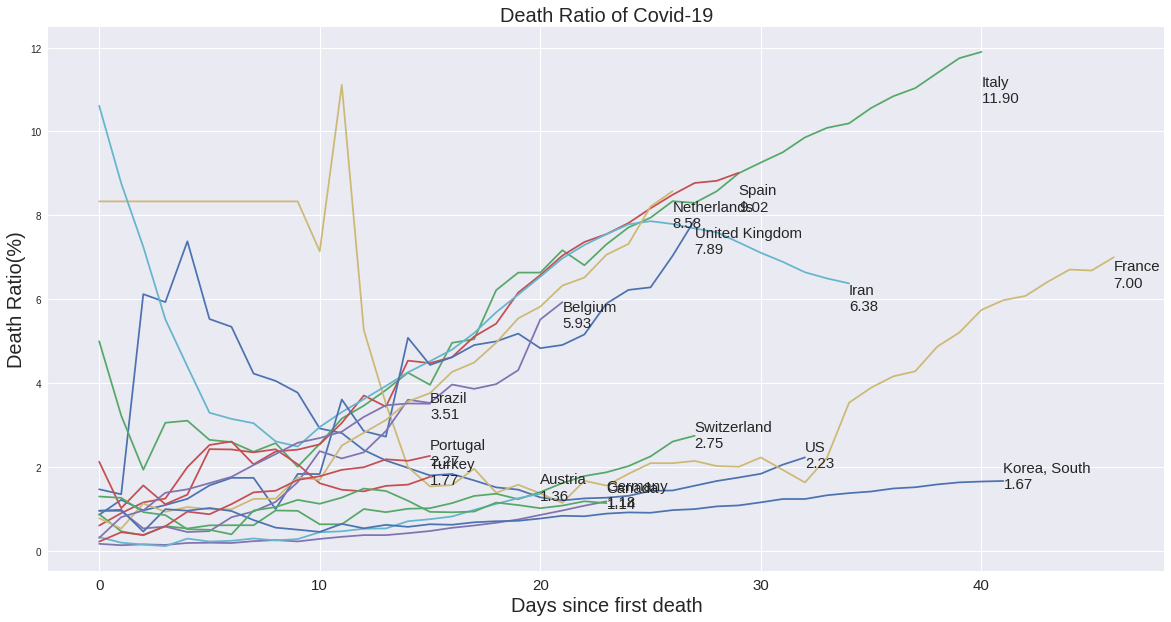

In [60]:
plt.figure(figsize=(20, 10))
for country in v_unique_countries:
  if country == 'China':
    continue
  cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  death_cases = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  deaths_ratio =[]
  for i, case in enumerate(cases):
    deaths_ratio.append(death_cases[i] * 100 / cases[i])
  deaths_ratio = [d for d in deaths_ratio if 0 < d < 13]
  adjusted_dates = [i for i in range(len(deaths_ratio))]
  plt.plot(deaths_ratio)
  plt.annotate(xy=[len(deaths_ratio)-1,deaths_ratio[-1] * 0.9], s=country + '\n' + '{:.2f}'.format(deaths_ratio[-1]), size=15)
plt.title('Death Ratio of Covid-19', size=20)
plt.xlabel('Days since first death', size=20)
plt.ylabel('Death Ratio(%)', size=20)
plt.xticks(size=15)

국가별 사망자 수 추이

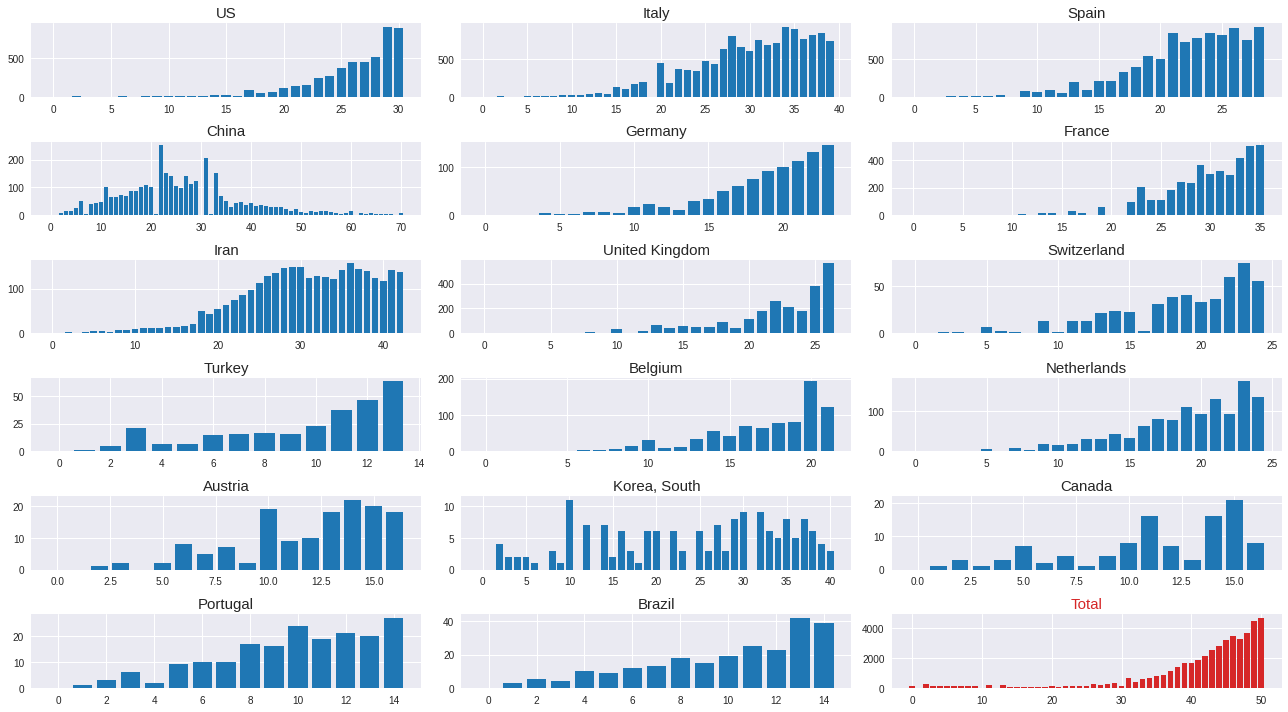

In [61]:
color = 'tab:blue'
fig, axs = plt.subplots(6, 3, figsize=(18, 10))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
  cases = deaths_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  cases = [c for c in cases if c > 1]
  adjusted_dates = [i for i in range(len(cases))]
  new_cases =[0]
  for i, case in enumerate(cases[:-1]):
    new_cases.append(cases[i + 1] - cases[i])
  row, col = divmod(index, 3)
  axs[row, col].bar(adjusted_dates, new_cases, color=color)
  axs[row, col].set_title(country, size=15)

total_cases = deaths.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
color = 'tab:red'
axs[5, 2].bar(adjusted_dates, new_cases, color=color)
axs[5, 2].set_title('Total', size=15, color=color)

fig.tight_layout()

이탈리아 일별 누적 확진자/신규 확진자 수

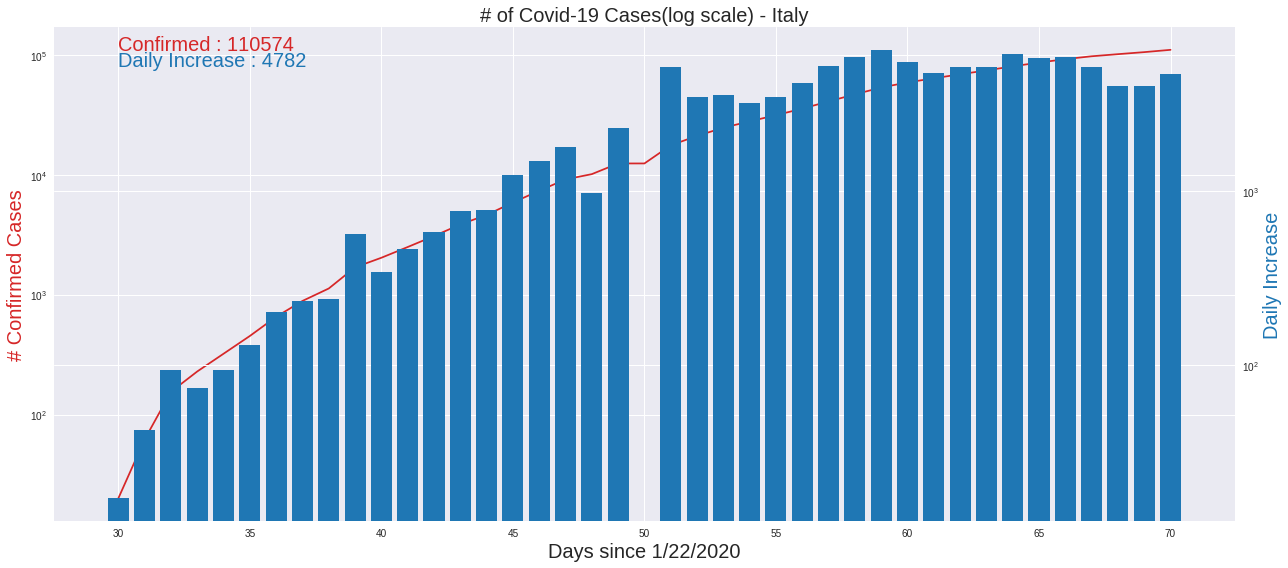

In [62]:
adjusted_dates = [i for i in range(len(dates))]
start =30
cases = confirmed_df.loc[confirmed_df['Country/Region'] == 'Italy', cols[4]:cols[-1]].sum()
cases = cases.values.reshape(len(dates))
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_yscale('log')
ax1.plot(adjusted_dates[start:], cases[start:], color=color)
ax1.set_xlabel('Days since 1/22/2020', size=20)
ax1.set_ylabel('# Confirmed Cases', color=color, size=20)
ax1.text(start, cases[-1], 'Confirmed : {}'.format(cases[-1]), size=20, color=color)
new_cases = [0]
for i, case in enumerate(cases[:-1]):
  new_cases.append(cases[i + 1] - cases[i])

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_yscale('log')
ax2.bar(adjusted_dates[start:], new_cases[start:], color=color)
ax2.set_ylabel('Daily Increase', color=color, size=20)
ax2.text(start, max(new_cases) * 0.8, 'Daily Increase : {}'.format(new_cases[-1]), size=20, color=color)

plt.title('# of Covid-19 Cases(log scale) - Italy', size=20)
fig.tight_layout()

미국 추이

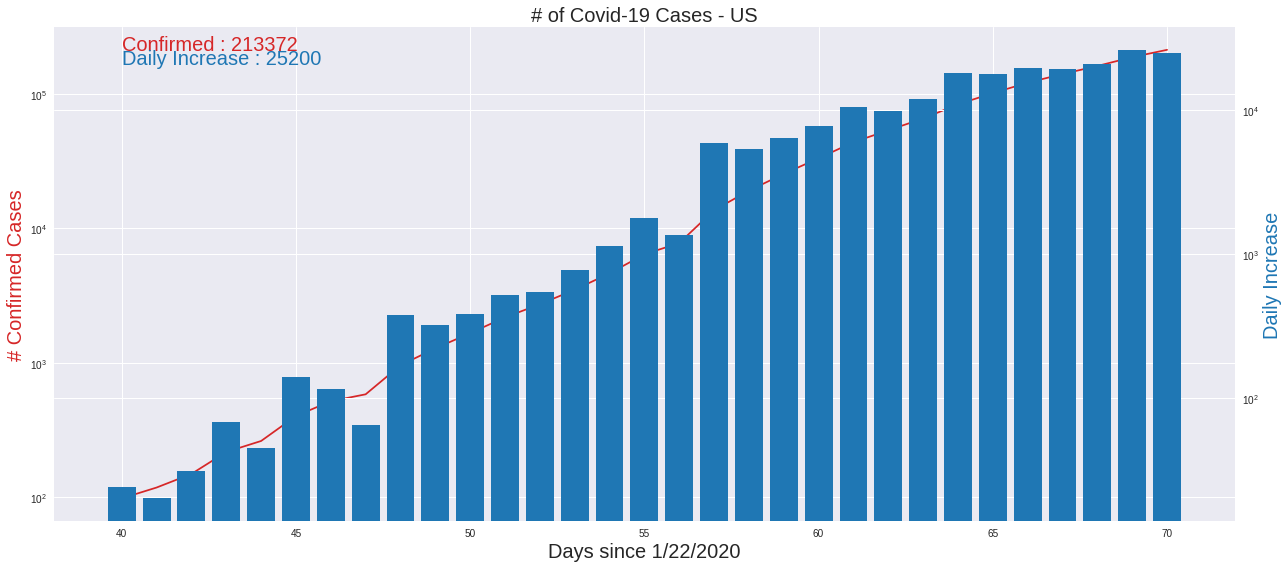

In [63]:
adjusted_dates = [i for i in range(len(dates))]

cases = confirmed_df.loc[confirmed_df['Country/Region'] == 'US', cols[4]:cols[-1]].sum()
cases = cases.values.reshape(len(dates))
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_yscale('log')
ax1.plot(adjusted_dates[40:], cases[40:], color=color)
ax1.set_xlabel('Days since 1/22/2020', size=20)
ax1.set_ylabel('# Confirmed Cases', color=color, size=20)
ax1.text(40, cases[-1], 'Confirmed : {}'.format(cases[-1]), size=20, color=color)
new_cases = [0]
for i, case in enumerate(cases[:-1]):
  new_cases.append(cases[i + 1] - cases[i])

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_yscale('log')
ax2.bar(adjusted_dates[40:], new_cases[40:], color=color)
ax2.set_ylabel('Daily Increase', color=color, size=20)
ax2.text(40, max(new_cases) * 0.8, 'Daily Increase : {}'.format(new_cases[-1]), size=20, color=color)

plt.title('# of Covid-19 Cases - US', size=20)
fig.tight_layout()

국가별,일별 누적 확진자 그래프(중국 제외)


(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 8 Text major ticklabel objects>)

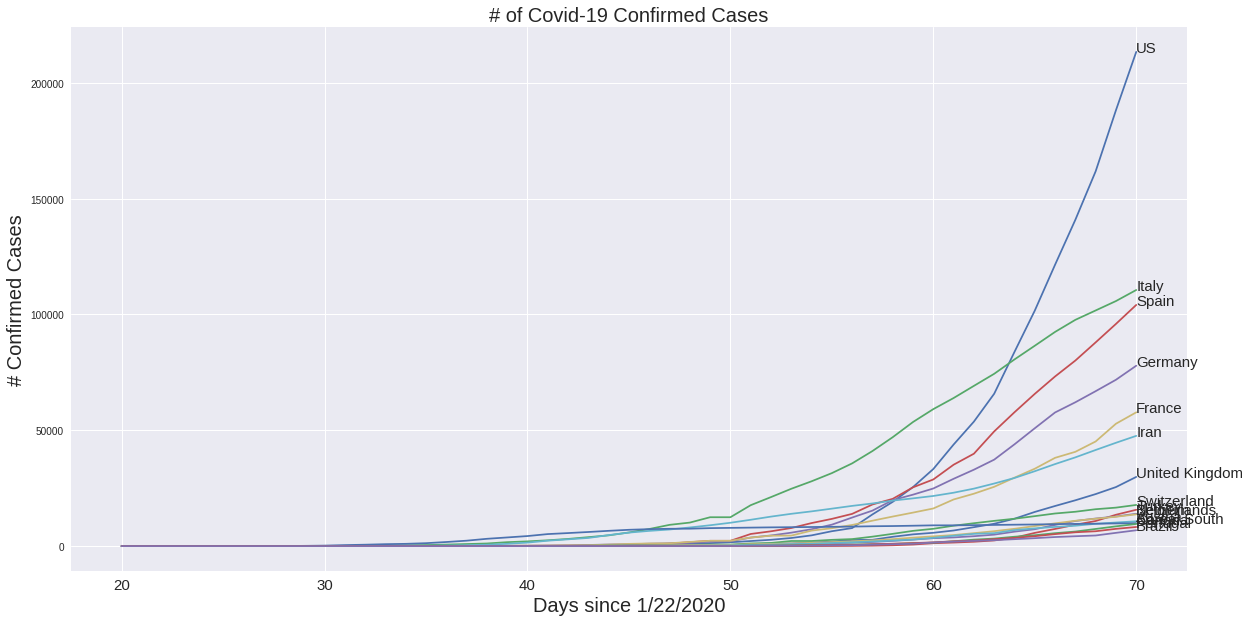

In [64]:
adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)
adjusted_dates = adjusted_dates[20:]

plt.figure(figsize=(20, 10))
for i, country in enumerate(unique_countries):
  if country == 'China':
    continue
  country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
  # country_confirmed_cases = [confirmed for confirmed in country_confirmed_cases if confirmed > 100]
  plt.plot(adjusted_dates, country_confirmed_cases[20:])
  plt.annotate(xy=[len(adjusted_dates) + 19,country_confirmed_cases[-1]], s=country, size=15)
plt.title('# of Covid-19 Confirmed Cases', size=20)
plt.xlabel('Days since 1/22/2020', size=20)
plt.ylabel('# Confirmed Cases', size=20)

plt.xticks(size=15)


확진자 100명 이후 경과일수에 따른 확진자 추이(중국 제외)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

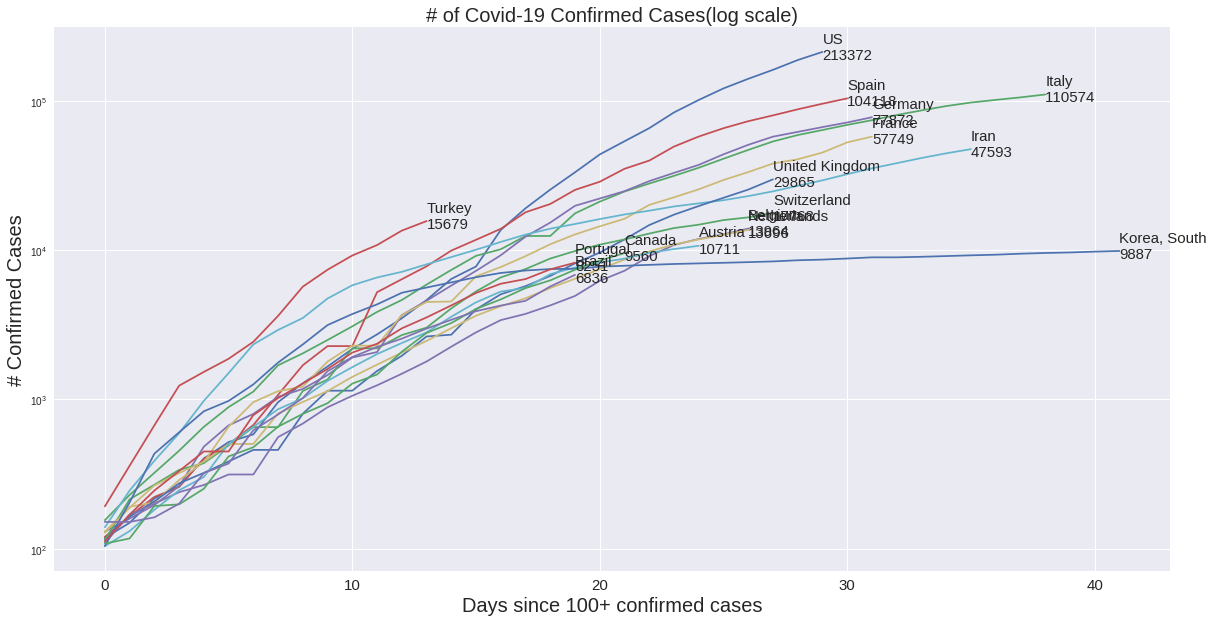

In [65]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
for country in v_unique_countries:
  if country == 'China':
    continue
  country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
  country_confirmed_cases = [confirmed for confirmed in country_confirmed_cases if confirmed > 100]
  plt.plot(country_confirmed_cases)
  plt.annotate(xy=[len(country_confirmed_cases)-1,country_confirmed_cases[-1] * 0.9], s=country + '\n' + str(country_confirmed_cases[-1]), size=15)
plt.title('# of Covid-19 Confirmed Cases(log scale)', size=20)
plt.xlabel('Days since 100+ confirmed cases', size=20)
plt.ylabel('# Confirmed Cases', size=20)
# plt.legend(v_unique_countries, loc='upper left')
plt.xticks(size=15)

국내 확진자/격리중/완치자/사망자

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 8 Text major ticklabel objects>)

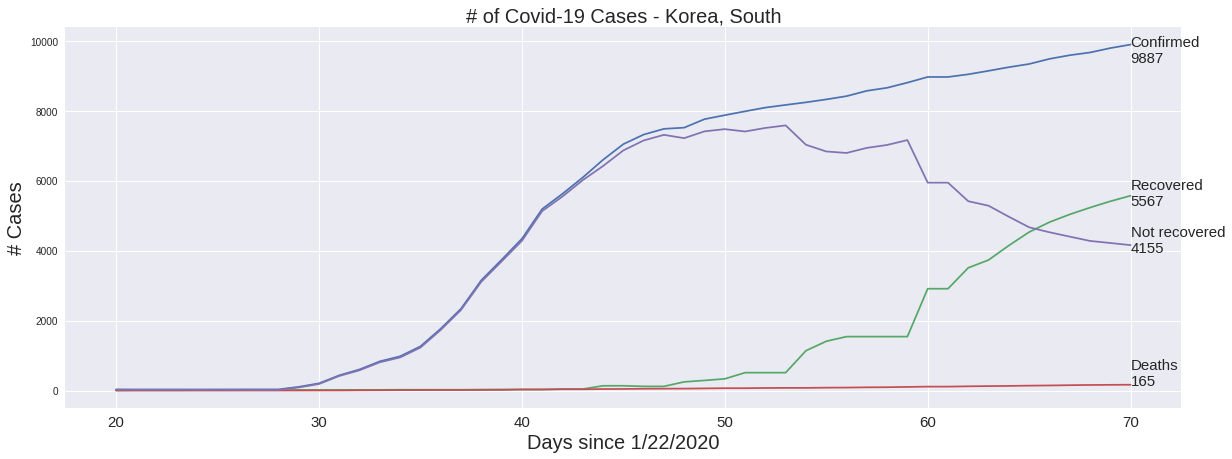

In [66]:
country = 'Korea, South'
adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)
adjusted_dates = adjusted_dates[20:]
plt.figure(figsize=(20, 7))
country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
plt.plot(adjusted_dates, country_confirmed_cases[20:])

country_recovered_cases = recoveries_df.loc[recoveries_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
country_recovered_cases = country_recovered_cases.values.reshape(len(dates))
plt.plot(adjusted_dates, country_recovered_cases[20:])

country_deaths_cases = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
country_deaths_cases = country_deaths_cases.values.reshape(len(dates))
plt.plot(adjusted_dates, country_deaths_cases[20:])

infected = [(confirmed - recovered - death) for confirmed, recovered, death in zip(country_confirmed_cases, country_recovered_cases, country_deaths_cases)]
plt.plot(adjusted_dates, infected[20:])

plt.title('# of Covid-19 Cases - Korea, South', size=20)
plt.xlabel('Days since 1/22/2020', size=20)
plt.ylabel('# Cases', size=20)
plt.annotate(xy=(len(dates)-1, country_confirmed_cases[-1]*0.95), s='Confirmed\n{}'.format(country_confirmed_cases[-1]), size=15)
plt.annotate(xy=(len(dates)-1, country_recovered_cases[-1]*0.95), s='Recovered\n{}'.format(country_recovered_cases[-1]), size=15)
plt.annotate(xy=(len(dates)-1, country_deaths_cases[-1]*0.95), s='Deaths\n{}'.format(country_deaths_cases[-1]), size=15)
plt.annotate(xy=(len(dates)-1, infected[-1]*0.95), s='Not recovered\n{}'.format(infected[-1]), size=15)
plt.xticks(size=15)
